In [113]:
from create_epochs import *
import matplotlib.pyplot as plt
import mne

### Recap: Plotting single-subject averaged ERPs

In [114]:
eeglab_raw = mne.io.read_raw_eeglab('S1.set')
eeglab_epochs = mne.read_epochs_eeglab('S1_elist_bins_chop_be_auto_filt_rej.set')

# This function also works for when eeglab_epochs has been ADed
epochs = epoching(eeglab_raw, eeglab_epochs, 'S1_bdf_18bins.txt', 'S1_elist_bins_auto.txt')

Reading C:\Users\jowan\erpclass\S1.fdt


C:\Users\jowan\AppData\Local\Temp\ipykernel_21364\2369234037.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeglab_raw = mne.io.read_raw_eeglab('S1.set')


Extracting parameters from C:\Users\jowan\erpclass\S1_elist_bins_chop_be_auto_filt_rej.set...
Not setting metadata
263 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\jowan\AppData\Local\Temp\ipykernel_21364\2369234037.py:2: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  eeglab_epochs = mne.read_epochs_eeglab('S1_elist_bins_chop_be_auto_filt_rej.set')


Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '14', '15', '16', '17', '18', '19', '199', '2', '20', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '22', '221', '222', '23', '230', '24', '240', '25', '250', '251', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', 'G', 

In [115]:
bins = parse_bdf('S1_bdf_18bins.txt')
evokeds = [epochs[v].average() for v in bins.values()]
len(evokeds)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

18

In [116]:
n_bins = len(evokeds)
n_chs, n_times = evokeds[0].get_data().shape
data = np.array([evokeds[i].get_data(units='uV') for i in range(len(evokeds))], dtype=object).reshape(n_bins, n_chs, n_times)
data.shape

(18, 34, 1400)

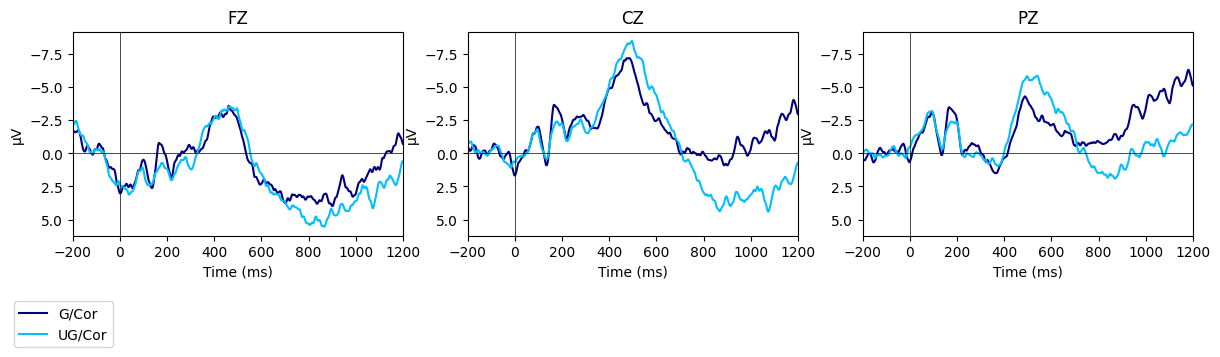

In [118]:
ch_dict = {}
for i, x in enumerate(epochs.ch_names):
    ch_dict[x] = i
    
ch_to_plot = ['FZ', 'CZ', 'PZ']
bins_to_plot = ['G/Cor', 'UG/Cor']

t = [i for i in range(-200, 1200)]
linestyles = ['solid', 'solid']
colors = ['navy','deepskyblue']

figure, axes = plt.subplots(1,3, figsize=(12, 3), sharey=True)
for ax, ch in zip(axes.copy().flatten(), ch_to_plot):
    for i, x in enumerate(bins_to_plot):
        ax.plot(t, data[int(list(bins.keys())[int(list(bins.values()).index(x))])-1][ch_dict[ch]],
                linestyle=linestyles[i], color=colors[i], label=x)
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch)
    ax.set_xlabel('Time (ms)')
    ax.set_xlim(-200, 1200)
    ax.set_ylabel('µV')
    ax.invert_yaxis()
    ax.yaxis.set_tick_params(labelbottom=True)
    hdl, lbl = ax.get_legend_handles_labels()
figure.legend(hdl, lbl, loc='upper left', bbox_to_anchor=[-0.001, 0.001])
figure.tight_layout()
plt.show()

### Difference wave: (Ungrammatical Correct) - (Grammatical Correct)

In [119]:
bins_dict = {}
for k, v in bins.items():
    bins_dict[v] = int(k)-1

diff_ug_g = mne.combine_evoked([evokeds[bins_dict['UG/Cor']], evokeds[bins_dict['G/Cor']]], weights=[1,-1])
diff_data = diff_ug_g.get_data(units='uV')

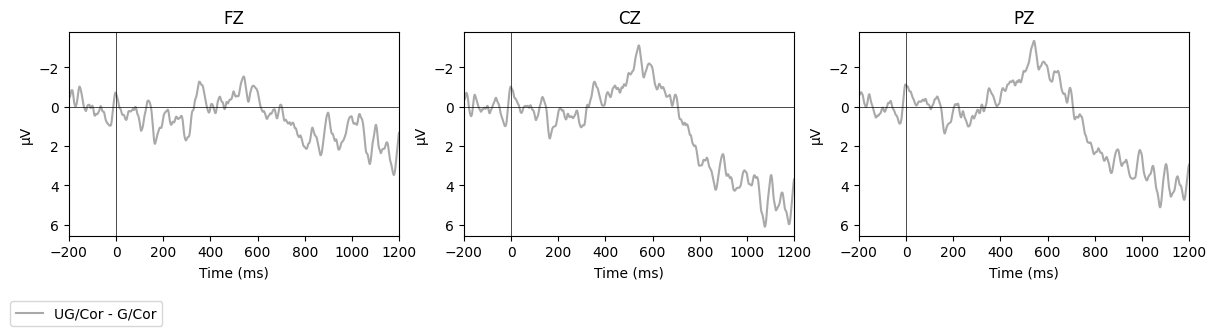

In [121]:
ch_to_plot = ['FZ', 'CZ', 'PZ']

figure, axes = plt.subplots(1,3, figsize=(12, 3), sharey=True)
for ax, ch in zip(axes.copy().flatten(), ch_to_plot):
    ax.plot(t, diff_data[ch_dict[ch]],
                linestyle='solid', color='darkgray', label='UG/Cor - G/Cor')
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch)
    ax.set_xlabel('Time (ms)')
    ax.set_xlim(-200, 1200)
    ax.set_ylabel('µV')
    ax.invert_yaxis()
    ax.yaxis.set_tick_params(labelbottom=True)
    hdl, lbl = ax.get_legend_handles_labels()
figure.legend(hdl, lbl, loc='upper left', bbox_to_anchor=[-0.001, 0.001])
figure.tight_layout()
plt.show()

In [122]:
# They don't need this cell
import pandas as pd
df = pd.read_csv('UG_Cor_minus_G_Cor.txt', sep='	').drop(columns=['time', 'Unnamed: 35'])
display(df)

eeglab_data = df.to_numpy().transpose()
np.where(abs(eeglab_data-diff_data) >= 1.0e-5)

,FP1,FP2,F7,F3,FZ,F4,F8,FT7,FC3,FCZ,...,P7,P3,PZ,P4,P8,O1,OZ,O2,HEO,VEO
0,-0.635660,0.222641,-0.767755,-0.375577,-0.542138,-0.507199,-0.220495,-0.708952,-0.434723,-0.564761,...,-0.770362,-0.942352,-0.706495,-0.001144,0.215093,-1.140479,-1.277588,-0.425722,0.370148,0.785620
1,-0.629918,0.177553,-0.803304,-0.415246,-0.511438,-0.417502,-0.155957,-0.751588,-0.465227,-0.537767,...,-0.798379,-0.941415,-0.662815,0.098672,0.296859,-1.038584,-1.171340,-0.333617,0.283287,0.754077
2,-0.625748,0.132063,-0.845114,-0.463272,-0.490410,-0.338374,-0.095024,-0.799765,-0.505467,-0.522980,...,-0.833402,-0.949527,-0.631418,0.172209,0.377123,-0.944609,-1.072860,-0.254474,0.184150,0.707710
3,-0.625679,0.087161,-0.894753,-0.521190,-0.483412,-0.276064,-0.041272,-0.854577,-0.557780,-0.525028,...,-0.877402,-0.968800,-0.617073,0.208170,0.451738,-0.864242,-0.988276,-0.195688,0.072518,0.644077
4,-0.635922,0.040480,-0.954553,-0.590285,-0.494185,-0.235590,0.000597,-0.917991,-0.623088,-0.546231,...,-0.933137,-0.998589,-0.620804,0.205484,0.515099,-0.801802,-0.921939,-0.161185,-0.046749,0.566851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,3.598465,0.467897,1.529910,1.318378,1.665170,0.801126,-2.023154,1.627284,1.397518,2.242082,...,1.965857,3.144698,3.225650,1.998491,0.647180,0.779256,1.929003,-0.106807,-7.766535,-0.309008
1396,3.523787,0.369860,1.488867,1.232348,1.544899,0.687555,-2.093183,1.588832,1.297929,2.116870,...,1.929173,3.058056,3.126513,1.935249,0.687729,0.757825,1.905956,-0.093212,-7.742447,-0.246114
1397,3.466762,0.301110,1.464257,1.165028,1.445925,0.593365,-2.138050,1.565911,1.216504,2.010379,...,1.907780,2.991109,3.045990,1.885669,0.726692,0.754772,1.900584,-0.067488,-7.710445,-0.182071
1398,3.427326,0.262008,1.455961,1.118549,1.372133,0.519882,-2.161211,1.558428,1.155995,1.927962,...,1.902120,2.946662,2.987116,1.854039,0.762335,0.766049,1.908874,-0.035747,-7.674861,-0.122948


(array([], dtype=int64), array([], dtype=int64))

### Difference wave: (Contralateral)- (Ipsilateral)

In [132]:
# Note to self: check with EEGLAB channel operations (check the data points are identical)

In [124]:
contra_ipsi_epochs = mne.channels.combine_channels(epochs, groups={'FT7-FT8': [ch_dict['FT7'], ch_dict['FT8']],
                                                                   'FT8-FT7': [ch_dict['FT8'], ch_dict['FT7']]},
                                           method=lambda data: data[:,0]-data[:,1])
contra_ipsi_epochs.ch_names

Not setting metadata
263 matching events found
No baseline correction applied
0 projection items activated


['FT7-FT8', 'FT8-FT7']

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


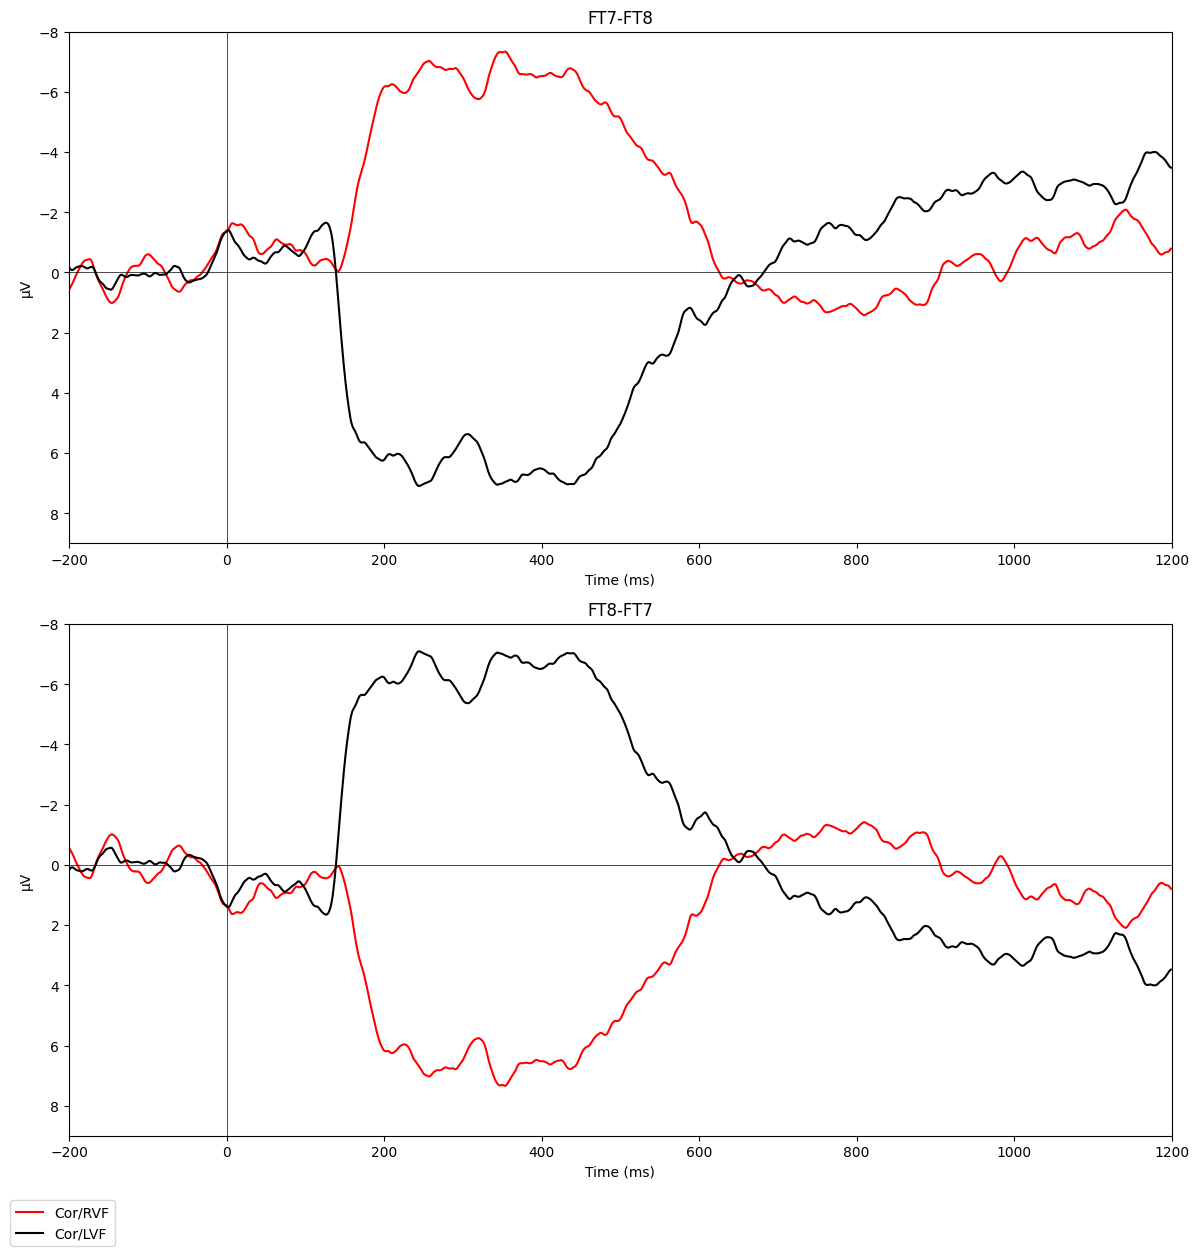

In [133]:
contra_ipsi_evokeds = [contra_ipsi_epochs[['G/Cor/RVF','UG/Cor/RVF']].average(), # Correct RVF
                       contra_ipsi_epochs[['G/Cor/LVF','UG/Cor/LVF']].average()] # Correct LVF
contra_ipsi_data = np.array([contra_ipsi_evokeds[i].get_data(units='uV') for i in range(len(contra_ipsi_evokeds))],
                            dtype=object).reshape(2, 2, n_times)

ch_to_plot = ['FT7-FT8', 'FT8-FT7']
bins_to_plot = ['Cor/RVF', 'Cor/LVF']
colors = ['red', 'black']

figure, axes = plt.subplots(2,1, figsize=(12, 12))
for ax, ch in zip(axes.copy().flatten(), ch_to_plot):
    for i, x in enumerate(bins_to_plot):
        ax.plot(t, contra_ipsi_data[i][ch_to_plot.index(ch)],
                linestyle='solid', color=colors[i], label=x)
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch)
    ax.set_xlabel('Time (ms)')
    ax.set_ylim(-8, 9)
    ax.set_xlim(-200, 1200)
    ax.set_ylabel('µV')
    ax.invert_yaxis() 
    ax.yaxis.set_tick_params(labelbottom=True)
    hdl, lbl = ax.get_legend_handles_labels()
figure.legend(hdl, lbl, loc='upper left', bbox_to_anchor=[-0.001, 0.001])
figure.tight_layout()
plt.show()

### Topo map: (Ungrammatical Correct) - (Grammatical Correct)